In [4]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit import Chem
from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np
import time

This is an script to analyze the output of experiment 1.

In [5]:
##########################################################
## Analysis of the conditioned output
##########################################################

# Init the time counter for the whole notebook
start = time.time()




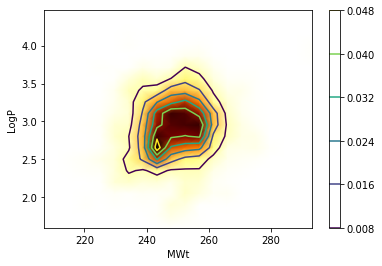

In [6]:
# 2D plot of MW vs logP of output set
smis = mf.smif2smis('./con2-50000.csv')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidf = mf.smis2smidf(smis)
smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
smidf['mwt'] = smidf['mol'].apply(Descriptors.MolWt)
smidf['logp'] = smidf['mol'].apply(Descriptors.MolLogP)
smidf = smidf[["mwt","logp"]]
mf.bidiplot(np.asarray(smidf), "MWt","LogP", d = True)

In [ ]:
# End the time counter for the whole notebook
end = time.time()
eltime = end - start
print('Exp6Analysis execution time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))